<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1><center>Hierarchical Clustering</center></h1>

Welcome to Lab of Hierarchical Clustering with Python using Scipy and Scikit-learn package.

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#hierarchical_agglomerative">Hierarchical Clustering - Agglomerative</a></li>
            <ol>
                <li><a href="#generating_data">Generating Random Data</a></li>
                <li><a href="#agglomerative_clustering">Agglomerative Clustering</a></li>
                <li><a href="#dendrogram">Dendrogram Associated for the Agglomerative Hierarchical Clustering</a></li>
            </ol>            
        <li><a href="#clustering_vehicle_dataset">Clustering on the Vehicle Dataset</a></li>
            <ol>
                <li><a href="#data_cleaning">Data Cleaning</a></li>
                <li><a href="#clustering_using_scipy">Clustering Using Scipy</a></li>
                <li><a href="#clustering_using_skl">Clustering using scikit-learn</a></li>
            </ol>
    </ol>
</div>
<br>
<hr>

<h1 id="hierarchical_agglomerative">Hierarchical Clustering - Agglomerative</h1>

We will be looking at a clustering technique, which is <b>Agglomerative Hierarchical Clustering</b>. Remember that agglomerative is the bottom up approach. <br> <br>
In this lab, we will be looking at Agglomerative clustering, which is more popular than Divisive clustering. <br> <br>
We will also be using Complete Linkage as the Linkage Criteria. <br>
<b> <i> NOTE: You can also try using Average Linkage wherever Complete Linkage would be used to see the difference! </i> </b>

In [1]:
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

<hr>
<h3 id="generating_data">Generating Random Data</h3>
We will be generating a set of data using the <b>make_blobs</b> class. <br> <br>
Input these parameters into make_blobs:
<ul>
    <li> <b>n_samples</b>: The total number of points equally divided among clusters. </li>
    <ul> <li> Choose a number from 10-1500 </li> </ul>
    <li> <b>centers</b>: The number of centers to generate, or the fixed center locations. </li>
    <ul> <li> Choose arrays of x,y coordinates for generating the centers. Have 1-10 centers (ex. centers=[[1,1], [2,5]]) </li> </ul>
    <li> <b>cluster_std</b>: The standard deviation of the clusters. The larger the number, the further apart the clusters</li>
    <ul> <li> Choose a number between 0.5-1.5 </li> </ul>
</ul> <br>
Save the result to <b>X1</b> and <b>y1</b>.

In [51]:
X1, y1 = make_blobs(n_samples=100, centers=[[4,4], [-2, -1], [1, 1], [10,4]], cluster_std=0.9)

Plot the scatter plot of the randomly generated data

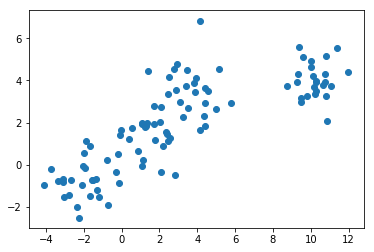

In [52]:
plt.scatter(X1[:, 0], X1[:, 1], marker='o') 

<hr>
<h3 id="agglomerative_clustering">Agglomerative Clustering</h3>
We will start by clustering the random data points we just created.

The <b> Agglomerative Clustering </b> class will require two inputs:
<ul>
    <li> <b>n_clusters</b>: The number of clusters to form as well as the number of centroids to generate. </li>
    <ul> <li> Value will be: 4 </li> </ul>
    <li> <b>linkage</b>: Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion. </li>
    <ul> 
        <li> Value will be: 'complete' </li> 
        <li> <b>Note</b>: It is recommended you try everything with 'average' as well </li>
    </ul>
</ul> <br>
Save the result to a variable called <b> agglom </b>

In [53]:
agglom = AgglomerativeClustering( linkage = 'average',n_clusters=4)

Fit the model with <b> X2 </b> and <b> y2 </b> from the generated data above.

In [61]:
agglom.fit(X1,y1)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=0.2,
                        linkage='average', memory=None, n_clusters=None,
                        pooling_func='deprecated')

In [62]:
agglom.labels_

array([3, 0, 0, 0, 0, 1, 0, 3, 4, 1, 4, 4, 3, 4, 3, 1, 0, 3, 3, 1, 0, 3,
       3, 0, 0, 4, 0, 3, 1, 1, 4, 1, 1, 0, 1, 4, 3, 4, 2, 3, 1, 0, 0, 1,
       3, 5, 2, 0, 0, 1, 3, 3, 4, 3, 0, 4, 3, 1, 4, 0, 0, 3, 1, 1, 0, 1,
       4, 1, 3, 4, 3, 4, 1, 4, 4, 3, 4, 1, 3, 1, 3, 1, 0, 0, 4, 4, 4, 0,
       4, 1, 3, 6, 1, 0, 0, 4, 2, 1, 1, 3])

Run the following code to show the clustering! <br>
Remember to read the code and comments to gain more understanding on how the plotting works.

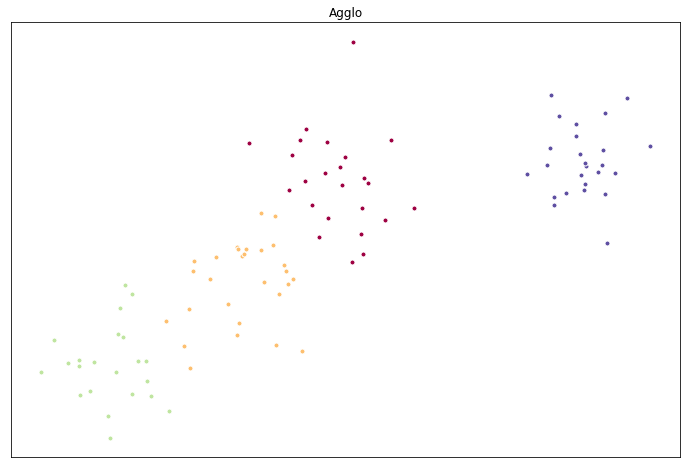

In [56]:
def plot_agglo(agglom,ground_truth=[]):
    X = X1
    
    ##Get which cluster they belong to
    agglom_labels = agglom.labels_    
    
    # Initialize the plot with the specified dimensions.
    fig = plt.figure(figsize=(12,8))

    # Colors uses a color map, which will produce an array of colors based on
    # the number of labels there are. We use set(k_means_labels) to get the
    # unique labels.
    colors = plt.cm.Spectral(np.linspace(0, 1, len(set(agglom_labels))))

    # Create a plot
    ax = fig.add_subplot(1, 1, 1)

#     if ground_truth:
#         assert(len(ground_truth) == len(colors))
    
    # For loop that plots the data points and centroids.
    # k will range from 0-3, which will match the possible clusters that each
    # data point is in.
    for k, col in enumerate(colors):

        # Create a list of all data points, where the data poitns that are 
        # in the cluster (ex. cluster 0) are labeled as true, else they are
        # labeled as false.
        my_members = (agglom_labels == k)

        # Plots the datapoints with color col.
        #gets all members whose k_means_labels == k
        ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.',markersize=10)

        
    if ground_truth:
            for x in ground_truth:
                ax.plot(x[0],x[1],'x',zorder=10,markersize=12)

            # Title of the plot
    ax.set_title('Agglo')

    # Remove x-axis ticks
    ax.set_xticks(())

    # Remove y-axis ticks
    ax.set_yticks(())

    # Show the plot
    plt.show()
    
plot_agglo(agglom)

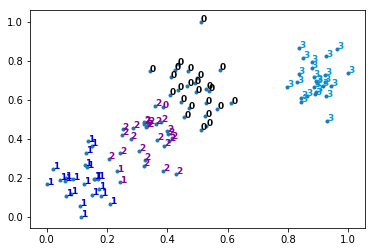

In [57]:
# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(6,4))

# These two lines of code are used to scale the data points down,
# Or else the data points will be scattered very far apart.

# Create a minimum and maximum range of X1.
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

# Get the average distance for X1.
X1 = (X1 - x_min) / (x_max - x_min)

# This loop displays all of the datapoints.
for i in range(X1.shape[0]):
    # Replace the data points with their respective cluster value 
    # (ex. 0) and is color coded with a colormap (plt.cm.spectral)
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
             color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})
    
# Remove the x ticks, y ticks, x and y axis
#plt.xticks([])
#plt.yticks([])
#plt.axis('off')



# Display the plot of the original data before clustering
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
# Display the plot
plt.show()

In [64]:
agglom.fit?

Can also specify a cuttoff rather than a number of clusters

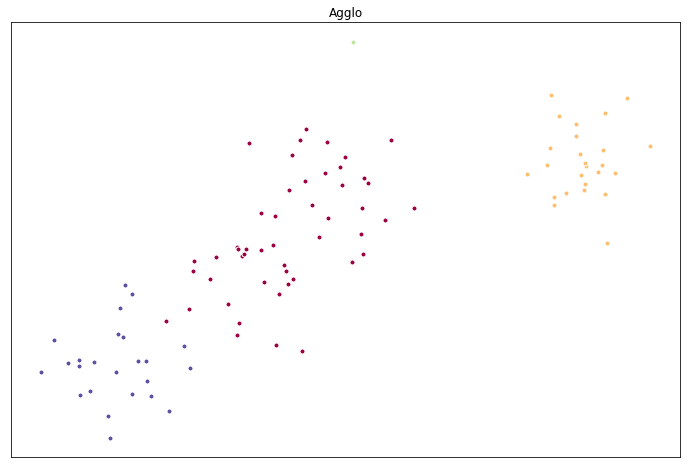

In [78]:
agglom = AgglomerativeClustering( linkage = 'average',n_clusters=4)
agglom.fit(X1)
plot_agglo(agglom)

In [79]:
jaccard_similarity_score(y1,agglom.labels_)

/Users/jordanwillis/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.24

In [86]:
agglom.children_

array([[ 10,  55],
       [  3,  54],
       [ 47,  48],
       [ 18,  56],
       [ 58, 100],
       [ 37,  74],
       [ 19,  49],
       [ 51,  78],
       [ 85,  95],
       [ 82,  93],
       [ 60, 102],
       [ 33,  87],
       [101, 110],
       [ 61,  99],
       [ 44,  70],
       [ 13,  30],
       [ 52, 108],
       [  2,  16],
       [  9,  34],
       [ 38,  46],
       [ 83,  94],
       [ 31,  97],
       [ 50, 103],
       [ 32,  40],
       [ 39, 114],
       [ 27, 113],
       [ 72,  98],
       [  1,   4],
       [  0,  36],
       [  8, 116],
       [ 11,  71],
       [109, 111],
       [  7, 122],
       [  5,  29],
       [ 66, 130],
       [ 80,  90],
       [ 53, 107],
       [ 15, 123],
       [ 20,  59],
       [ 79, 106],
       [ 67,  77],
       [124, 132],
       [112, 117],
       [ 42, 120],
       [ 81, 126],
       [  6,  64],
       [ 17, 128],
       [ 88, 104],
       [ 26,  41],
       [ 43,  89],
       [ 24, 143],
       [ 96, 119],
       [131,


<h3 id="dendrogram">Dendrogram Associated for the Agglomerative Hierarchical Clustering</h3>
Remember that a <b>distance matrix</b> contains the <b> distance from each point to every other point of a dataset </b>. <br>
Use the function <b> distance_matrix, </b> which requires <b>two inputs</b>. Use the Feature Matrix, <b> X2 </b> as both inputs and save the distance matrix to a variable called <b> dist_matrix </b> <br> <br>
Remember that the distance values are symmetric, with a diagonal of 0's. This is one way of making sure your matrix is correct. <br> (print out dist_matrix to make sure it's correct)

In [90]:
dist_matrix = distance_matrix(X1,X1) 
print(dist_matrix)

[[0.         0.77127592 0.60746309 ... 0.50735039 0.45539617 0.18915354]
 [0.77127592 0.         0.21855658 ... 0.26393724 0.50360417 0.62668731]
 [0.60746309 0.21855658 0.         ... 0.15258376 0.2851567  0.49956143]
 ...
 [0.50735039 0.26393724 0.15258376 ... 0.         0.32054668 0.37030866]
 [0.45539617 0.50360417 0.2851567  ... 0.32054668 0.         0.44243035]
 [0.18915354 0.62668731 0.49956143 ... 0.37030866 0.44243035 0.        ]]


Using the <b> linkage </b> class from hierarchy, pass in the parameters:
<ul>
    <li> The distance matrix </li>
    <li> 'complete' for complete linkage </li>
</ul> <br>
Save the result to a variable called <b> Z </b>

In [91]:
Z = hierarchy.linkage(dist_matrix, 'complete')

/Users/jordanwillis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


A Hierarchical clustering is typically visualized as a dendrogram as shown in the following cell. Each merge is represented by a horizontal line. The y-coordinate of the horizontal line is the similarity of the two clusters that were merged, where cities are viewed as singleton clusters. 
By moving up from the bottom layer to the top node, a dendrogram allows us to reconstruct the history of merges that resulted in the depicted clustering. 

Next, we will save the dendrogram to a variable called <b>dendro</b>. In doing this, the dendrogram will also be displayed.
Using the <b> dendrogram </b> class from hierarchy, pass in the parameter:
<ul> <li> Z </li> </ul>

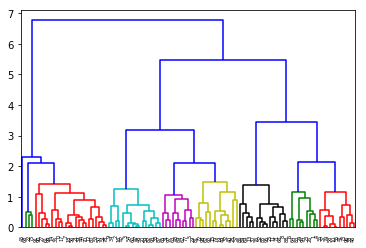

In [99]:
dendro = hierarchy.dendrogram(Z,color_threshold=2)

## Practice
We used __complete__ linkage for our case, change it to __average__ linkage to see how the dendogram changes.

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [25.0, 25.0, 42.5, 42.5],
  [10.0, 10.0, 33.75, 33.75],
  [65.0, 65.0, 75.0, 75.0],
  [85.0, 85.0, 95.0, 95.0],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [105.0, 105.0, 122.5, 122.5],
  [90.0, 90.0, 113.75, 113.75],
  [70.0, 70.0, 101.875, 101.875],
  [145.0, 145.0, 155.0, 155.0],
  [165.0, 165.0, 175.0, 175.0],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [185.0, 185.0, 202.5, 202.5],
  [170.0, 170.0, 193.75, 193.75],
  [150.0, 150.0, 181.875, 181.875],
  [85.9375, 85.9375, 165.9375, 165.9375],
  [21.875, 21.875, 125.9375, 125.9375],
  [235.0, 235.0, 245.0, 245.0],
  [225.0, 225.0, 240.0, 240.0],
  [255.0, 255.0, 265.0, 265.0],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [260.0, 260.0, 282.5, 282.5],
  [232.5, 232.5, 271.25, 271.25],
  [305.0, 305.0, 315.0, 315.0],
  [345.0, 345.0, 355.0, 355.0],
  [335.0, 335.0, 350.0, 350.0]

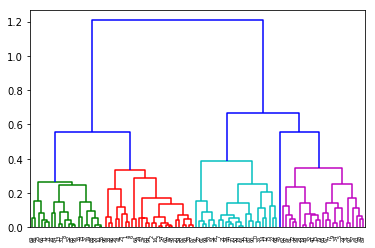

In [116]:
# write your code here
hierarchy.dendrogram(hierarchy.linkage(X1,'complete'),color_threshold=0.5)


Double-click __here__ for the solution.

<!-- Your answer is below:
    
Z = hierarchy.linkage(dist_matrix, 'average')
dendro = hierarchy.dendrogram(Z)

-->

<hr>
<h1 id="clustering_vehicle_dataset">Clustering on Vehicle dataset</h1>

Imagine that an automobile manufacturer has developed prototypes for a new vehicle. Before introducing the new model into its range, the manufacturer wants to determine which existing vehicles on the market are most like the prototypes--that is, how vehicles can be grouped, which group is the most similar with the model, and therefore which models they will be competing against.

Our objective here, is to use clustering methods, to find the most distinctive clusters of vehicles. It will summarize the existing vehicles and help manufacturers to make decision about the supply of new models.

### Download data
To download the data, we will use **`!wget`** to download it from IBM Object Storage.  
__Did you know?__ When it comes to Machine Learning, you will likely be working with large datasets. As a business, where can you host your data? IBM is offering a unique opportunity for businesses, with 10 Tb of IBM Cloud Object Storage: [Sign up now for free](http://cocl.us/ML0101EN-IBM-Offer-CC)

In [117]:
!wget -O cars_clus.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cars_clus.csv

--2019-11-27 19:58:50--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cars_clus.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17774 (17K) [text/csv]
Saving to: ‘cars_clus.csv’

cars_clus.csv       100%[===================>]  17.36K  --.-KB/s    in 0.02s   

2019-11-27 19:58:50 (895 KB/s) - ‘cars_clus.csv’ saved [17774/17774]



## Read data
lets read dataset to see what features the manufacturer has collected about the existing models.

In [155]:
filename = 'cars_clus.csv'

#Read csv
pdf = pd.read_csv(filename)
print ("Shape of dataset: ", pdf.shape)

pdf

Shape of dataset:  (159, 16)


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0
5,Audi,A6,18.780,23.555,0.000,33.950,2.800,200.000,108.700,76.100,192.000,3.561,18.500,22.000,2.933,0.0
6,Audi,A8,1.380,39.000,0.000,62.000,4.200,310.000,113.000,74.000,198.200,3.902,23.700,21.000,0.322,0.0
7,BMW,323i,19.747,$null$,0.000,26.990,2.500,170.000,107.300,68.400,176.000,3.179,16.600,26.100,2.983,0.0
8,BMW,328i,9.231,28.675,0.000,33.400,2.800,193.000,107.300,68.500,176.000,3.197,16.600,24.000,2.223,0.0
9,BMW,528i,17.527,36.125,0.000,38.900,2.800,193.000,111.400,70.900,188.000,3.472,18.500,24.800,2.864,0.0


The feature sets include  price in thousands (price), engine size (engine_s), horsepower (horsepow), wheelbase (wheelbas), width (width), length (length), curb weight (curb_wgt), fuel capacity (fuel_cap) and fuel efficiency (mpg).

<h2 id="data_cleaning">Data Cleaning</h2>
lets simply clear the dataset by dropping the rows that have null value:

In [168]:
print ("Shape of dataset before cleaning: ", pdf.size)
plotter = pdf.apply(pd.to_numeric, errors='coerce')
plotter['manufact'] = pdf['manufact']
plotter['model'] = pdf['model']

##drop rows that contain an na
plotter = plotter.dropna()
print ("Shape of dataset after cleaning: ", plotter.size)
##Must be zero to N continuous so we can look it up latter
plotter.reset_index(drop=True,inplace=True)

Shape of dataset before cleaning:  2544
Shape of dataset after cleaning:  1872


### Feature selection
Lets select our feature set:

In [170]:

##I want to keep the same indexes from plotter
featureset = plotter[['engine_s',  'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]

### Normalization
Now we can normalize the feature set. __MinMaxScaler__ transforms features by scaling each feature to a given range. It is by default (0, 1). That is, this estimator scales and translates each feature individually such that it is between zero and one.

In [171]:
from sklearn.preprocessing import MinMaxScaler
x = featureset.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx[0:5]

array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.2310559 , 0.13364055, 0.43333333],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50372671, 0.31797235, 0.33333333],
       [0.35714286, 0.39240506, 0.47722343, 0.52694611, 0.62849534,
        0.60714286, 0.35483871, 0.23333333],
       [0.11428571, 0.24050633, 0.21691974, 0.33532934, 0.38082557,
        0.34254658, 0.28110599, 0.4       ],
       [0.25714286, 0.36708861, 0.34924078, 0.80838323, 0.56724368,
        0.5173913 , 0.37788018, 0.23333333]])

<h2 id="clustering_using_scipy">Clustering using Scipy</h2>
In this part we use Scipy package to cluster the dataset:  
First, we calculate the distance matrix. 

In [172]:
import scipy
leng = feature_mtx.shape[0]
D = scipy.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

In agglomerative clustering, at each iteration, the algorithm must update the distance matrix to reflect the distance of the newly formed cluster with the remaining clusters in the forest. 
The following methods are supported in Scipy for calculating the distance between the newly formed cluster and each:
    - single
    - complete
    - average
    - weighted
    - centroid
    
    
We use __complete__ for our case, but feel free to change it to see how the results change.

In [173]:
import pylab
import scipy.cluster.hierarchy
Z = hierarchy.linkage(D, 'complete')

/Users/jordanwillis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


Essentially, Hierarchical clustering does not require a pre-specified number of clusters. However, in some applications we want a partition of disjoint clusters just as in flat clustering.
So you can use a cutting line:

In [184]:
from scipy.cluster.hierarchy import fcluster

##maximum distance
max_d = 2
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([ 2, 11,  9, 12,  9,  7, 12, 11, 11,  9,  9,  9,  7,  7, 11,  2, 12,
       11, 11, 11,  8,  3, 18, 12, 12,  9, 12,  9,  1, 12, 12, 17, 16, 15,
       16,  6,  9,  2, 14, 12, 11,  5, 10,  5, 15, 14, 16,  3, 12, 12, 10,
        7,  3,  2, 12, 11,  4, 13, 10, 11, 11,  7,  7,  5,  3, 12, 12, 11,
       14,  8, 14, 12, 12, 11,  5, 10,  9, 12, 11,  7,  8,  2, 12, 11,  9,
       10, 12,  7, 10,  7,  1, 12,  9, 12, 12, 11,  9,  9, 13, 13, 13,  3,
        3,  2,  3, 12, 11,  2,  2,  2, 14, 15,  2,  2, 12,  2,  2],
      dtype=int32)

In [164]:
fcluster?


Also, you can determine the number of clusters directly:

In [181]:
from scipy.cluster.hierarchy import fcluster
##cutoff in number of clusters
k=4
clusters = fcluster(Z, k, criterion='maxclust')
clusters


array([1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       4, 2, 2, 2, 2, 2, 1, 2, 2, 3, 3, 3, 3, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       3, 2, 3, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1,
       2, 3, 1, 1, 2, 1, 1], dtype=int32)

Now, plot the dendrogram:

In [182]:
clusters

array([1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       4, 2, 2, 2, 2, 2, 1, 2, 2, 3, 3, 3, 3, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       3, 2, 3, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1,
       2, 3, 1, 1, 2, 1, 1], dtype=int32)

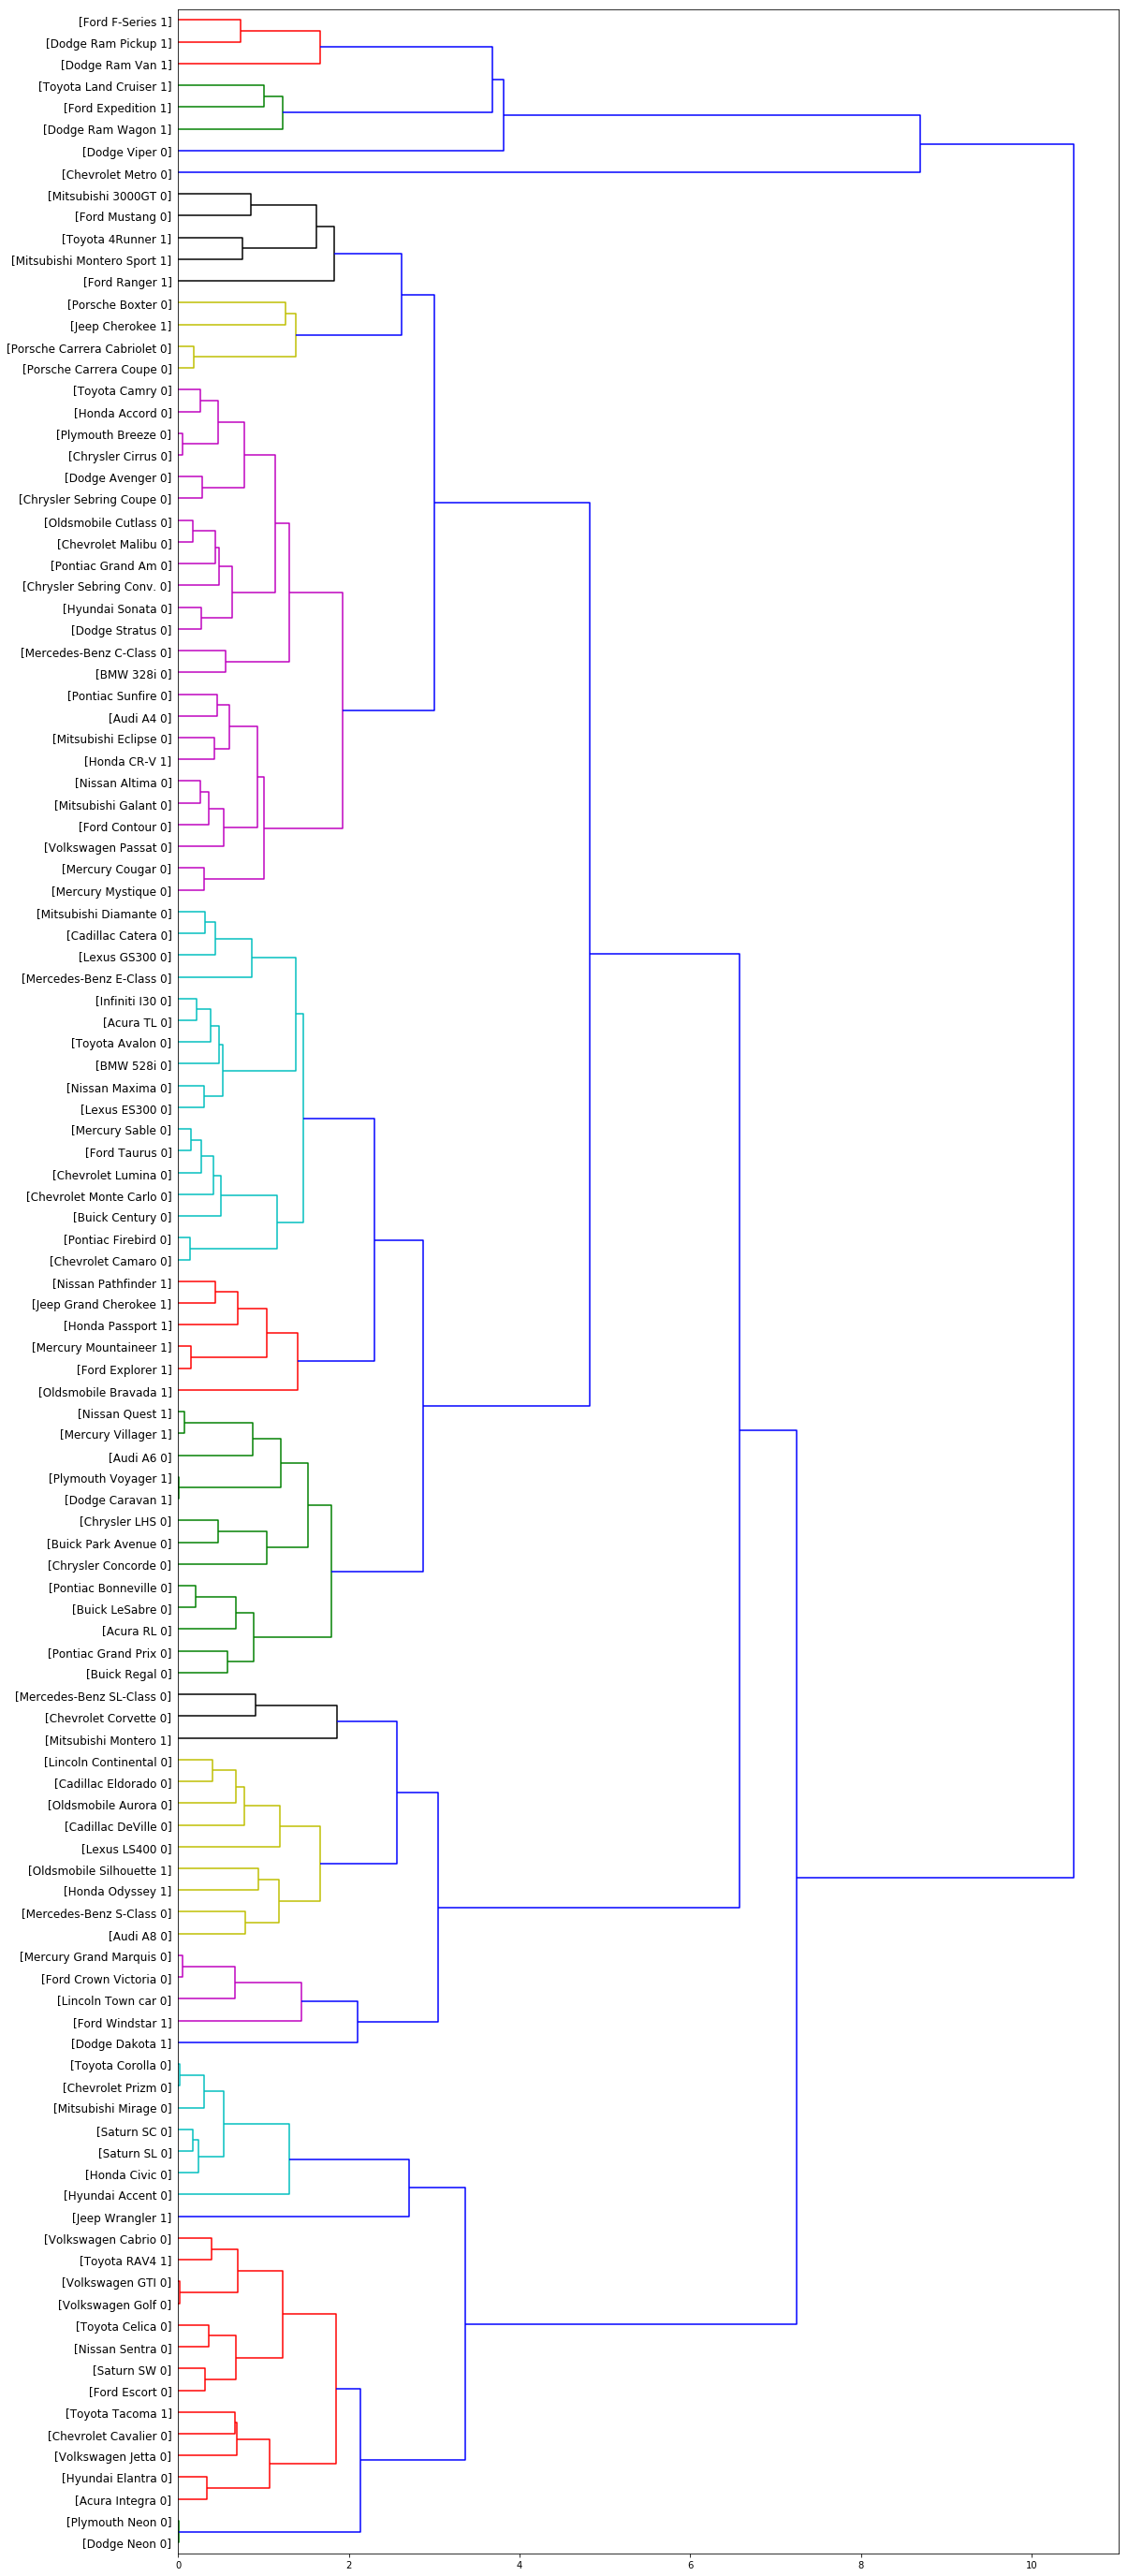

In [186]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (plotter['manufact'][id], plotter['model'][id], int(float(plotter['type'][id])) )
    
dendro = hierarchy.dendrogram(Z, color_threshold=2, leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

<h2 id="clustering_using_skl">Clustering using scikit-learn</h2>
Lets redo it again, but this time using scikit-learn package:

In [187]:
dist_matrix = distance_matrix(feature_mtx,feature_mtx) 
print(dist_matrix)

[[0.         0.57777143 0.75455727 ... 0.28530295 0.24917241 0.18879995]
 [0.57777143 0.         0.22798938 ... 0.36087756 0.66346677 0.62201282]
 [0.75455727 0.22798938 0.         ... 0.51727787 0.81786095 0.77930119]
 ...
 [0.28530295 0.36087756 0.51727787 ... 0.         0.41797928 0.35720492]
 [0.24917241 0.66346677 0.81786095 ... 0.41797928 0.         0.15212198]
 [0.18879995 0.62201282 0.77930119 ... 0.35720492 0.15212198 0.        ]]


Now, we can use the 'AgglomerativeClustering' function from scikit-learn library to cluster the dataset. The AgglomerativeClustering performs a hierarchical clustering using a bottom up approach. The linkage criteria determines the metric used for the merge strategy:

- Ward minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.
- Maximum or complete linkage minimizes the maximum distance between observations of pairs of clusters.
- Average linkage minimizes the average of the distances between all observations of pairs of clusters.

In [196]:
agglom = AgglomerativeClustering(n_clusters = 3, linkage = 'complete')
agglom.fit(feature_mtx)
agglom.labels_

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 2, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1])

And, we can add a new field to our dataframe to show the cluster of each row:

In [197]:
plotter['cluster_'] = agglom.labels_
plotter.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,cluster_
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0,1
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0,0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0,0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0,1
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0,0


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'mpg')

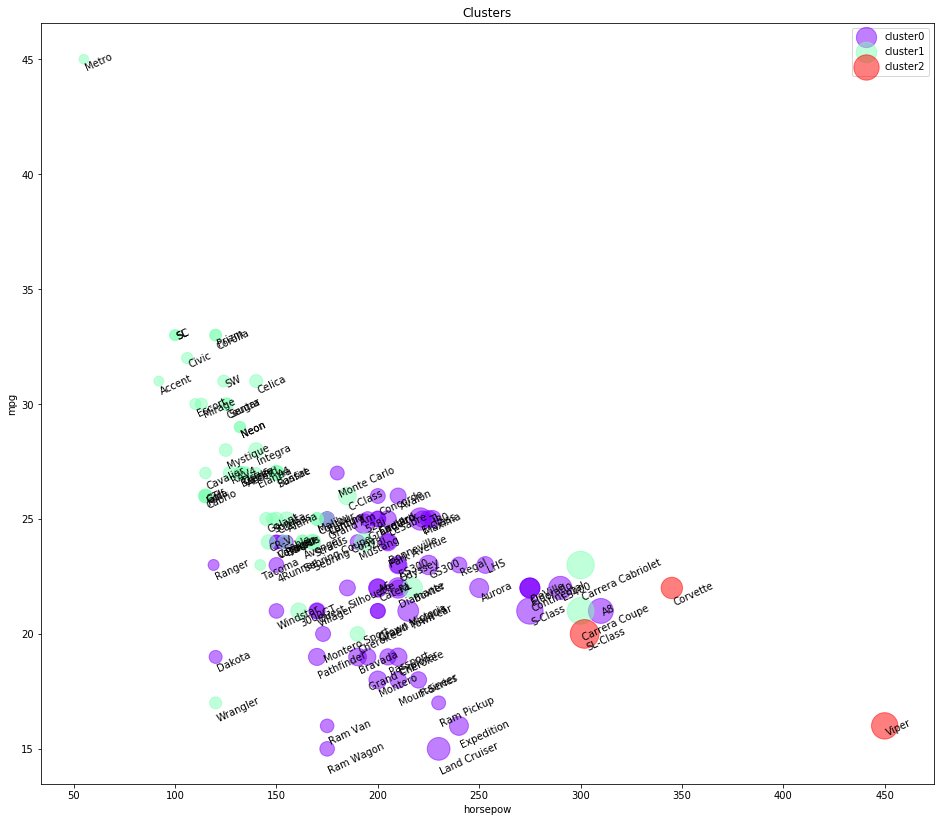

In [198]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = plotter[plotter.cluster_ == label]
    for i in subset.index:
            plt.text(subset.horsepow[i], subset.mpg[i],str(subset['model'][i]), rotation=25) 
    plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

As you can see, we are seeing the distribution of each cluster using the scatter plot, but it is not very clear where is the centroid of each cluster. Moreover, there are 2 types of vehicles in our dataset, "truck" (value of 1 in the type column) and "car" (value of 1 in the type column). So, we use them to distinguish the classes, and summarize the cluster. First we count the number of cases in each group:

In [199]:
plotter.groupby(['cluster_','type'])['cluster_'].count()

cluster_  type
0         0.0     37
          1.0     24
1         0.0     48
          1.0      5
2         0.0      3
Name: cluster_, dtype: int64

Now we can look at the characteristics of each cluster:

In [200]:
agg_cars = plotter.groupby(['cluster_','type'])['horsepow','engine_s','mpg','price'].mean()
agg_cars

horsepow  engine_s        mpg      price
cluster_ type                                            
0        0.0   217.540541  3.602703  23.481081  31.837027
         1.0   183.208333  3.550000  19.541667  25.573375
1        0.0   144.625000  2.220833  27.395833  20.075479
         1.0   145.000000  2.580000  22.200000  17.009200
2        0.0   365.666667  6.233333  19.333333  66.010000


It is obvious that we have 3 main clusters with the majority of vehicles in those.

__Cars__:
- Cluster 1: with almost high mpg, and low in horsepower.
- Cluster 2: with good mpg and horsepower, but higher price than average.
- Cluster 3: with low mpg, high horsepower, highest price.
    
    
    
__Trucks__:
- Cluster 1: with almost highest mpg among trucks, and lowest in horsepower and price.
- Cluster 2: with almost low mpg and medium horsepower, but higher price than average.
- Cluster 3: with good mpg and horsepower, low price.


Please notice that we did not use __type__ , and __price__ of cars in the clustering process, but Hierarchical clustering could forge the clusters and discriminate them with quite high accuracy.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'mpg')

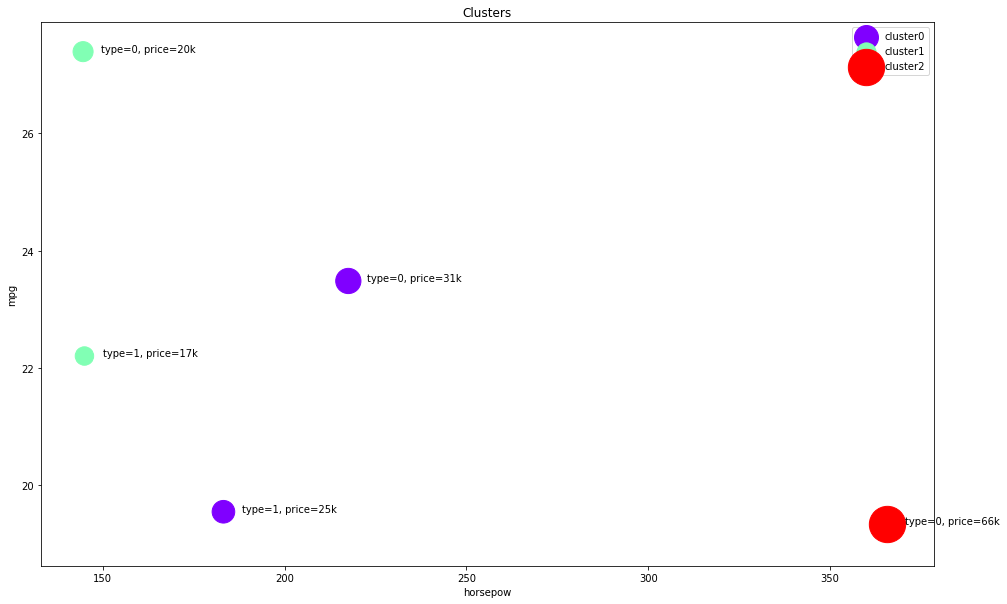

In [201]:
plt.figure(figsize=(16,10))
for color, label in zip(colors, cluster_labels):
    subset = agg_cars.loc[(label,),]
    for i in subset.index:
        plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
    plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster'+str(label))
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>